# [Lab Session 3](fourier.ipynb)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


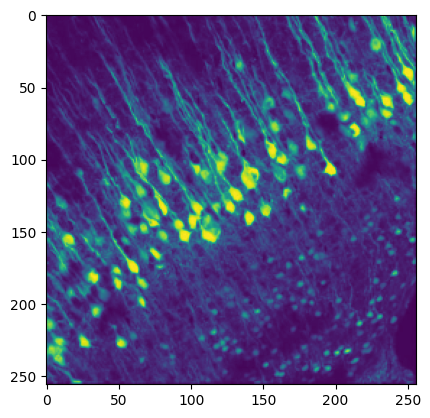

In [2]:
cell_img = plt.imread('data/cells.png')
cell_resized = resize(cell_img, (256,256))
plt.figure()
plt.imshow(cell_resized)

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [3]:
cell_ft = np.fft.fft2(cell_resized)
cell_ft.dtype


dtype('complex128')

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [4]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

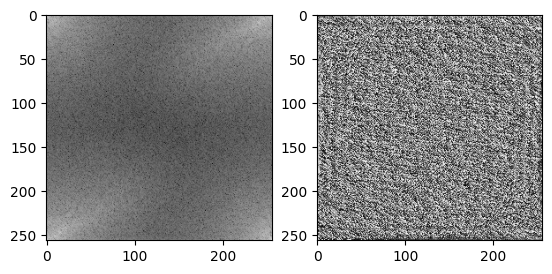

In [5]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


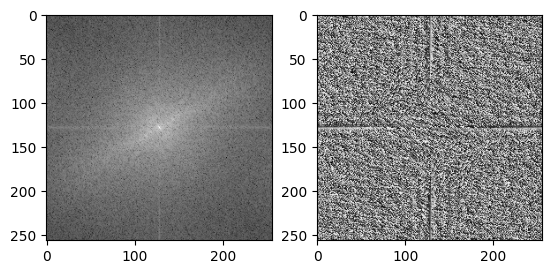

In [6]:
shift = np.fft.fftshift(cell_ft)
amplitude_shift = np.abs(shift)
phase_shift = np.angle(shift)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_shift), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_shift, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


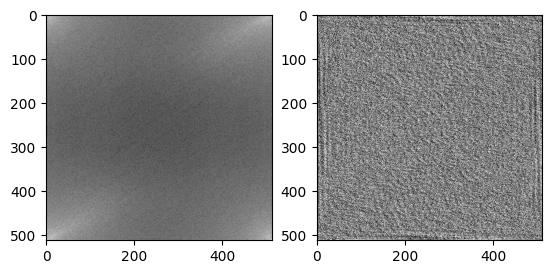

In [7]:
cell_inverse = np.fft.ifft2(cell_img)

amplitude_inverse = np.abs(cell_inverse)
phase_inverse = np.angle(cell_inverse)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_inverse), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_inverse, 'gray')

---


**[Task 2 (a).]()** Load the brain MR image.


<Figure size 640x480 with 0 Axes>

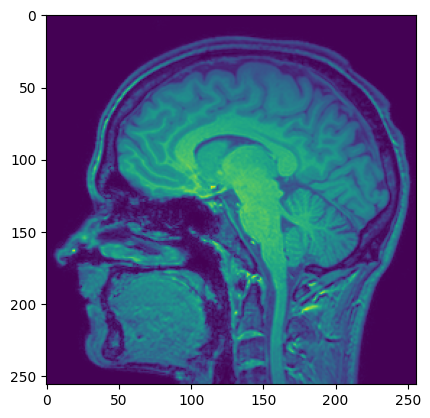

<Figure size 640x480 with 0 Axes>

In [13]:
mr_img = plt.imread("data/brain_mri.png")
plt.imshow(mr_img)
plt.figure()

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


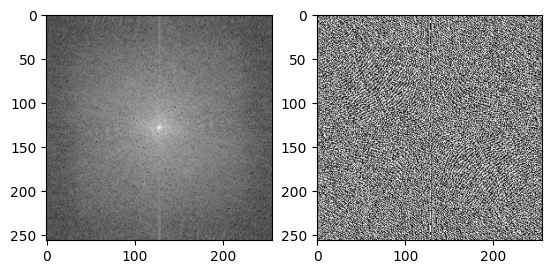

In [12]:
mr_ft = np.fft.fft2(mr_img) 

mr_ft_shift = np.fft.fftshift(mr_ft)
amplitude_shift2 = np.abs(mr_ft_shift )
phase_shift2 = np.angle(mr_ft_shift )

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_shift2), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_shift2, 'gray')

def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain MR image and the phase of cell image. Do the IFFT and display the resulting image.


In [14]:
merge1 = to_complex_array(amplitude_shift2,phase_shift)
merge1_reverse = np.fft.ifftshift(merge1)
merge1_inverse = np.fft.ifft2(merge1_reverse)

merge1_amp_inv = np.abs(merge1_inverse)
merge1_ph_inv = np.angle(merge1_inverse)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.log(merge1_amp_inv), 'gray')
plt.subplot(1,2,2)
plt.imshow(merge1_ph_inv, 'gray')



NameError: name 'to_complex_array' is not defined

**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


In [15]:
merge1 = to_complex_array(amplitude_shift,phase_shift2)
merge1_reverse = np.fft.ifftshift(merge1)
merge1_inverse = np.fft.ifft2(merge1_reverse)

merge1_amp_inv = np.abs(merge1_inverse)
merge1_ph_inv = np.angle(merge1_inverse)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.log(merge1_amp_inv), 'gray')
plt.subplot(1,2,2)
plt.imshow(merge1_ph_inv, 'gray')

NameError: name 'to_complex_array' is not defined

---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [16]:
filter_window_size = 50

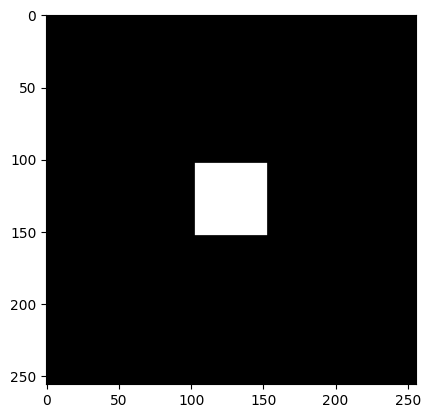

In [17]:

rows, cols =256,256
mask = np.zeros((rows,cols))

window = 50
#wo ist das fenster
# center of the mask 

centerrow = rows//2
centercols = cols//2

mask[centerrow - window//2:centerrow + window//2, centercols -window//2: centercols +window//2 ] = 1

plt.imshow(mask, cmap= 'gray')



**[Task 3 (b).]()** Create a highpass filter maks.


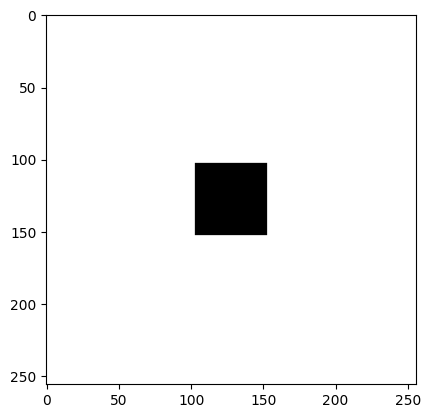

In [18]:
mask_highpass = 1- mask
plt.imshow(mask_highpass, cmap= 'gray')

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


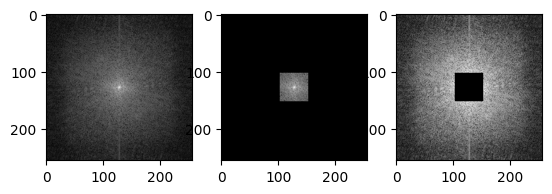

In [31]:
def log_scale(x):
    return np.log(1+x)

#apply masks to amplitude
amp_lp = amplitude_shift2 * mask
amp_hp = amplitude_shift2 * mask_highpass

#original
plt.subplot(2,3,1)
plt.imshow(np.log(1+amplitude_shift2), cmap= "gray")

#lp
plt.subplot(2,3,2)
plt.imshow(np.log(1+amp_lp ), cmap= "gray")
    #hp
plt.subplot(2,3,3)
plt.imshow(np.log(1+amp_hp ), cmap= "gray")

**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


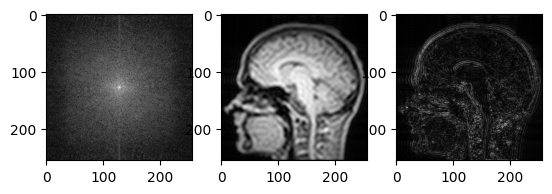

In [40]:
#apply masks to amplitude
F_lp = amp_lp * np.exp(1j * phase_shift2)
F_hp = amp_hp * np.exp(1j * phase_shift2)

img_lp = np.abs(np.fft.ifft2(np.fft.ifftshift(F_lp)))
img_hp = np.abs(np.fft.ifft2(np.fft.ifftshift(F_hp)))

#original
plt.subplot(1,3,1)
plt.imshow(np.log(1+amplitude_shift2), cmap= "gray")

#lp
plt.subplot(1,3,2)
plt.imshow(np.log(1+img_lp ), cmap= "gray")
    #hp
plt.subplot(1,3,3)
plt.imshow(np.log(1+img_hp ), cmap= "gray")

plt.show()


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [54]:
def dft2(img):
    M,N = img.shape

    dft = np.zeros(img.shape, dtype=complex)

    for u in range (M):
        for v in range (N):
            sum_value = 0.0 +0.0j
            for x in range(M):
                for y in range(N):
                    exponent = -2j * np.pi * ((u*x)/M+(v*y)/N)
                    sum_value += img[x,y]*np.exp(exponent)
            dft[u,v]= sum_value/ (M*N)
    return dft              

**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [60]:
def idft2(img):
    M,N = img.shape

    idft = np.zeros(img.shape, dtype=complex)

    for u in range (M):
        for v in range (N):
            sum_value = 0.0 +0.0j
            for x in range(M):
                for y in range(N):
                    exponent = 2j * np.pi * ((u*x)/M+(v*y)/N)
                    sum_value += img[x,y]*np.exp(exponent)
            idft[u,v]= sum_value/ (M*N)
    return idft       

Due to high computational costs, we need to resize the image.


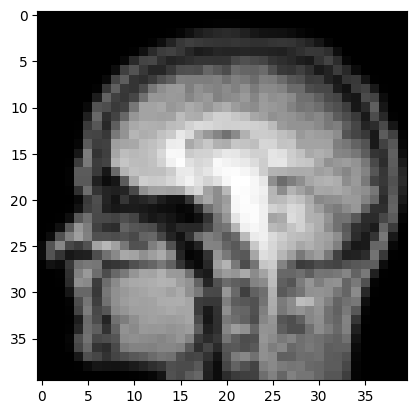

In [61]:
test_img = resize(mr_img, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


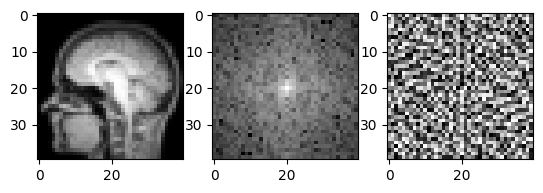

In [74]:
test_img = resize(mr_img, (40, 40))
dft = dft2(test_img)

dft_shift = np.fft.fftshift(dft)

amp = np.abs(dft_shift)
phase = np.angle(dft_shift)

# amp_shift = np.fft.fftshift(amp)
# phase_shift = np.fft.fftshift(phase)

# amp_log = (1+amp_shift)

#original
plt.subplot(1,3,1)
plt.imshow(test_img, cmap= "gray")

#lp
plt.subplot(1,3,2)
plt.imshow(np.log(amp), cmap= "gray")
    #hp
plt.subplot(1,3,3)
plt.imshow(phase, cmap= "gray")

plt.show()



**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


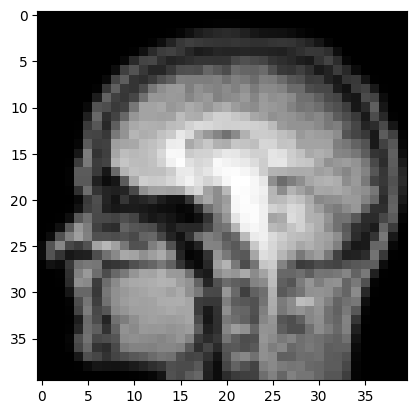

In [76]:
MR_reconstr = idft2(dft)

plt.imshow(MR_reconstr.real, cmap= "gray")


plt.show()


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


In [79]:
F_np = np.fft.fft2(test_img, norm = "forward")

comparison = np.allclose(dft,F_np)

print(comparison)

True


**[Task 4 (f).]()** Round the arrays and compare them again.


In [80]:
mean_diff = np.mean(np.abs(dft - F_np))
dft_round = np.round(dft, 5)
F_np_round = np.round(F_np, 5)

comparison_round = np.allclose(dft_round,F_np_round)
A = np.all(dft_round == F_np_round)

print(A)


True


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)


In [81]:
%timeit dft = dft2(test_img)

%timeit F_np = np.fft.fft2(test_img, norm = "forward")

4.58 s ± 72.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
37.8 μs ± 11.2 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
